In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
#

In [2]:
# from kaggle.api.kaggle_api_extended import KaggleApi

# # Set your Kaggle API key file path
# kaggle_api_key_path = "/content/drive/MyDrive/Kaggle API/kaggle.json"

# # Authenticate with your Kaggle API key
# api = KaggleApi()
# api.authenticate(key_path=kaggle_api_key_path)

# # Download the competition dataset
# api.competition_download_files(competition="sentiment-analysis-on-movie-reviews", path="./")


In [3]:
!pip install contractions
!pip install autocorrect
!pip install colorama
!pip install seaborn
!pip install nltk

# import nltk
# nltk.download('all')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import contractions
from autocorrect import Speller


# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (9,5)
pd.set_option('display.max_columns', 50)

In [5]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
# import tensorflow as tf
# import os

# # Note that the `tpu` argument is for Colab-only
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices('TPU'))

In [7]:
import matplotlib
import sklearn
import autocorrect

# Autocorrect Version
try:
    import importlib.metadata as metadata
except ImportError:
    import importlib_metadata as metadata

print("Pandas Version: ", pd.__version__)
print("NumPy Version: ", np.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("NLTK Version: ", nltk.__version__)
print("Scikit-Learn Version: ", sklearn.__version__)
print("Autocorrect Version: ", metadata.version("autocorrect"))

Pandas Version:  2.1.4
NumPy Version:  1.26.2
Matplotlib Version:  3.8.2
Seaborn Version:  0.13.0
NLTK Version:  3.8.1
Scikit-Learn Version:  1.3.2
Autocorrect Version:  2.6.1


In [8]:
# strategy = tf.distribute.TPUStrategy(resolver)

<a id="part_1_def"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ User Defined Functions (DEFs) ✨</p>

<a href="#part_1" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 1</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [9]:
## Some Useful User-Defined-Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]
###############################################################################
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

#     df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
#     print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
#           colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Descriptive Statistics \n", attrs=['bold']), df.describe().round(2),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='') # Gives a statstical breakdown of the data.
#     print(colored("Descriptive Statistics (Categorical Columns) \n", attrs=['bold']), df.describe(include=object).T,'\n',
#           colored('*'*100, 'red', attrs=['bold']), sep='') # Gives a statstical breakdown of the data.

###############################################################################
def first_look(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))
###############################################################################


def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')

###############################################################################


<a id="part_1_reading"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Reading & Understanding Data ✨</p>

In [10]:
# from zipfile import ZipFile
# from pathlib import Path
# import pandas as pd

# # Kaggle API ile indirdiğiniz dosyaların bulunduğu dizini belirtin
# DATA_ROOT = Path("/content/drive/MyDrive/Kaggle")

# # Dıştaki zip dosyasını aç
# outer_zip_path = DATA_ROOT / 'sentiment-analysis-on-movie-reviews.zip'
# with ZipFile(outer_zip_path, 'r') as outer_zip:
#     # İçerideki zip dosyalarını çıkar
#     outer_zip.extractall(DATA_ROOT)

# # İçerideki train.tsv.zip dosyasını aç
# inner_zip_path = DATA_ROOT / 'train.tsv.zip'
# with ZipFile(inner_zip_path, 'r') as inner_zip:
#     # TSV dosyasını oku
#     train = pd.read_csv(inner_zip.open('train.tsv'), sep="\t")

# # İçerideki train.tsv.zip dosyasını aç
# inner_zip_path_1 = DATA_ROOT / 'test.tsv.zip'
# with ZipFile(inner_zip_path_1, 'r') as inner_zip:
#     # TSV dosyasını oku
#     test = pd.read_csv(inner_zip.open('test.tsv'), sep="\t")
# # Diğer işlemleri buraya ekleyebilirsiniz
# print("Shape of test dataset:",test.shape)
# print("Shape of train dataset:",train.shape)

In [11]:
from zipfile import ZipFile
from pathlib import Path
import pandas as pd

# Kaggle API ile indirdiğiniz dosyaların bulunduğu dizini belirtin
DATA_ROOT = Path("")

# Dıştaki zip dosyasını aç
outer_zip_path ='sentiment-analysis-on-movie-reviews.zip'
with ZipFile(outer_zip_path, 'r') as outer_zip:
    # İçerideki zip dosyalarını çıkar
    outer_zip.extractall(DATA_ROOT)

# İçerideki train.tsv.zip dosyasını aç
inner_zip_path = DATA_ROOT / 'train.tsv.zip'
with ZipFile(inner_zip_path, 'r') as inner_zip:
    # TSV dosyasını oku
    train = pd.read_csv(inner_zip.open('train.tsv'), sep="\t")

# İçerideki train.tsv.zip dosyasını aç
inner_zip_path_1 = DATA_ROOT / 'test.tsv.zip'
with ZipFile(inner_zip_path_1, 'r') as inner_zip:
    # TSV dosyasını oku
    test = pd.read_csv(inner_zip.open('test.tsv'), sep="\t")
# Diğer işlemleri buraya ekleyebilirsiniz
print("Shape of test dataset:",test.shape)
print("Shape of train dataset:",train.shape)

Shape of test dataset: (66292, 3)
Shape of train dataset: (156060, 4)


In [12]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [13]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [14]:
test.isna().sum()

PhraseId      0
SentenceId    0
Phrase        1
dtype: int64

In [15]:
first_looking(train)
duplicate_values(train)

Shape:(156060, 4)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None
****************************************************************************************************
Number of Uniques:
PhraseId      156060
SentenceId      8529
Phrase        156060
Sentiment          5
dtype: int64
****************************************************************************************************
Missing Values:
Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []
************************************************************

In [16]:
train["Sentiment"].value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

In [17]:
# 0 - negative
# 1 - somewhat negative
# 2 - neutral
# 3 - somewhat positive
# 4 - positive

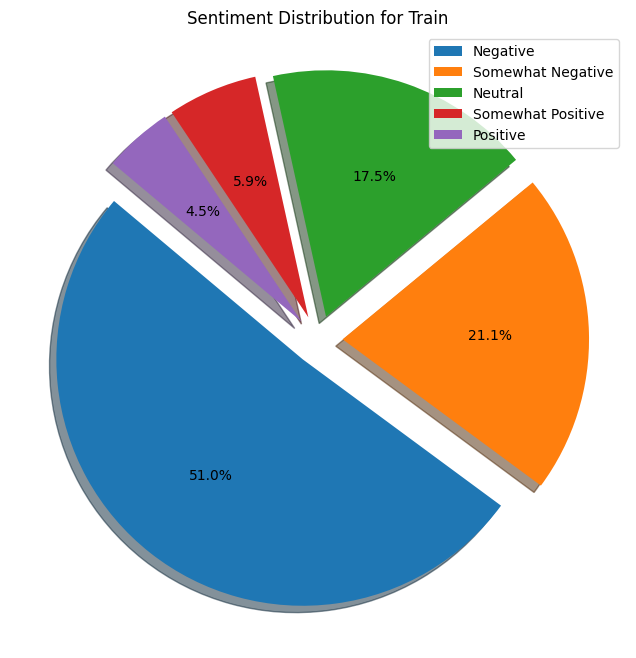

In [18]:
plt.figure(figsize=(8, 8))

explode = [0.1] * len(train['Sentiment'].unique())
plt.pie(train['Sentiment'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'])
plt.title('Sentiment Distribution for Train')
plt.axis('off')
plt.show()

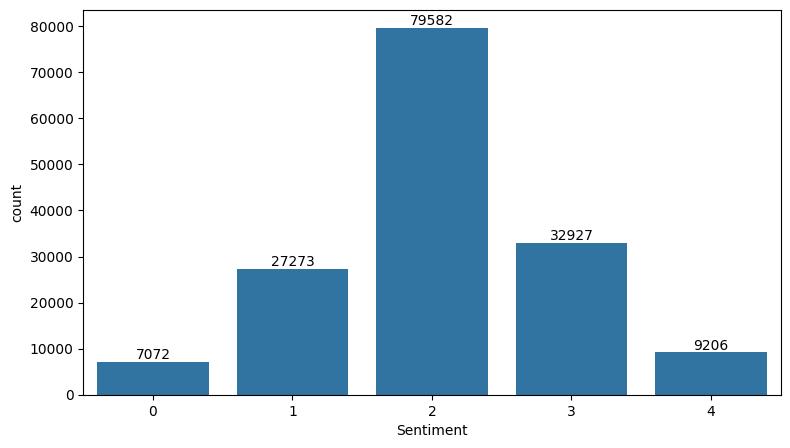

In [19]:
ax = sns.countplot(data =train, x = "Sentiment")
ax.bar_label(ax.containers[0]);

<a id="part_1_text_mining"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Text Mining ✨</p>

<a href="#part_1" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 1</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



<a id="part_1_tokenization"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Tokenization, Noise Removal, Lexicon Normalization ✨</p>

<a href="#part_1" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 1</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [20]:
stop_words = stopwords.words("english")

for i in ["not", "no"]:
  stop_words.remove(i)

In [21]:
def cleaning(data):
    #1. Correction of text
    # spell=Speller(fast=True)
    # correction_data=spell(data)

    #2. Contraction of text
    contraction_data=contractions.fix(data)

    #3. Tokenize and lowercase
    text_tokens = word_tokenize(contraction_data.lower())

    #4. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #5. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #6. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #10. joining
    return " ".join(text_cleaned)

In [22]:
list(train["Phrase"].sample(1))

["if you 're going to subjugate truth to the tear-jerking demands of soap opera"]

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [24]:
negative_sentences = train[train["Sentiment"] == 0]["Phrase"]
negative_sentences

101         would have a hard time sitting through this one
103               have a hard time sitting through this one
157       Aggressive self-glorification and a manipulati...
159         self-glorification and a manipulative whitewash
201                  Trouble Every Day is a plodding mess .
                                ...                        
155965    has turned out nearly 21\/2 hours of unfocused...
155967    turned out nearly 21\/2 hours of unfocused , e...
155970         of unfocused , excruciatingly tedious cinema
155971            unfocused , excruciatingly tedious cinema
155973                             , excruciatingly tedious
Name: Phrase, Length: 7072, dtype: object

In [25]:
positive_sentences = train[train["Sentiment"] == 4]["Phrase"]
positive_sentences

63        This quiet , introspective and entertaining in...
66        quiet , introspective and entertaining indepen...
74                                             entertaining
77                                         is worth seeking
117       A positively thrilling combination of ethnogra...
                                ...                        
155946                              is laughingly enjoyable
155955    a unique culture that is presented with univer...
155961                                with universal appeal
156007    really do a great job of anchoring the charact...
156010    a great job of anchoring the characters in the...
Name: Phrase, Length: 9206, dtype: object

<a id="part_1_word_detect_1"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Collect Words (positive and negative separately) ✨</p>

<a href="#part_1" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 1</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [26]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'This quiet , introspective and entertaining independent is worth seeking . quiet , introspective and entertaining independent entertaining is worth seeking A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder thrilling A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis . nearly epic rooted in a sincere performance by the title character undergoing midlife crisis . in a sincere performance a sincere performance sincere performance recommend Snow Dogs high hilarity The performances are an absolute joy . are an absolute joy . an absolute joy joy extravagant better this one is a sweet and modest and ultimately winning story . is a sweet and modest and ultimately winning story . a sweet and modest sweet ultimately winning 

In [27]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

"would have a hard time sitting through this one have a hard time sitting through this one Aggressive self-glorification and a manipulative whitewash self-glorification and a manipulative whitewash Trouble Every Day is a plodding mess . is a plodding mess plodding mess could hate it for the same reason hate it hate is Oedekerk 's realization of his childhood dream to be in a martial-arts flick , and proves that sometimes the dreams of youth should remain just that baseball movies that try too hard to be mythic Hampered -- no , paralyzed -- by a self-indulgent script ... that aims for poetry and ends up sounding like satire . a self-indulgent script There 's very little sense to what 's going on here , avoid almost feels as if the movie is more interested in entertaining itself than in amusing us . The movie 's progression into rambling incoherence gives new meaning to the phrase ` fatal script error . ' The movie 's progression into rambling incoherence gives new meaning to the phrase 

<a id="part_1_word_detect_2"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Create Word Cloud (for most common words in recommended not recommended reviews separately) ✨</p>

<a href="#part_1" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 1</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [28]:
from wordcloud import WordCloud

In [29]:
wordcloud_positive = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")

In [30]:
wordcloud_positive.generate(positive_words)

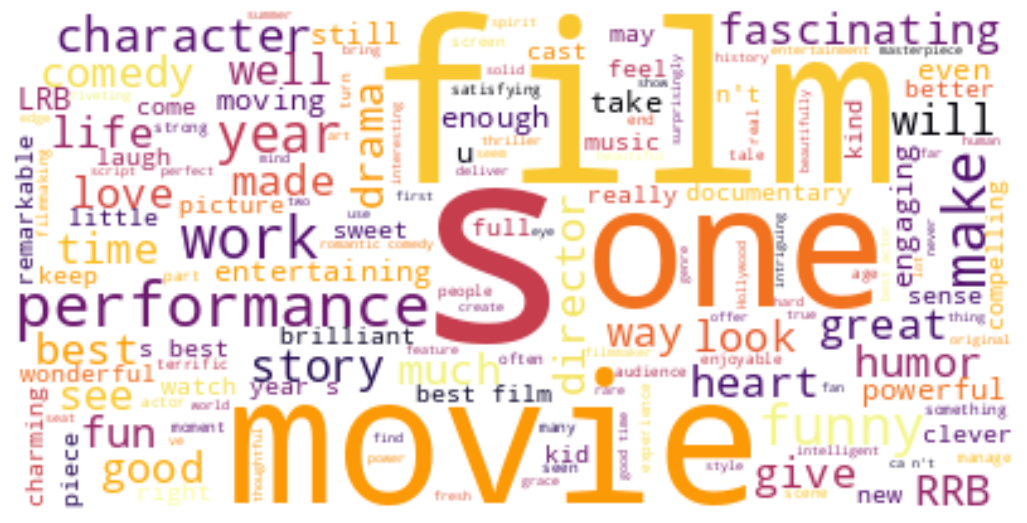

In [31]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

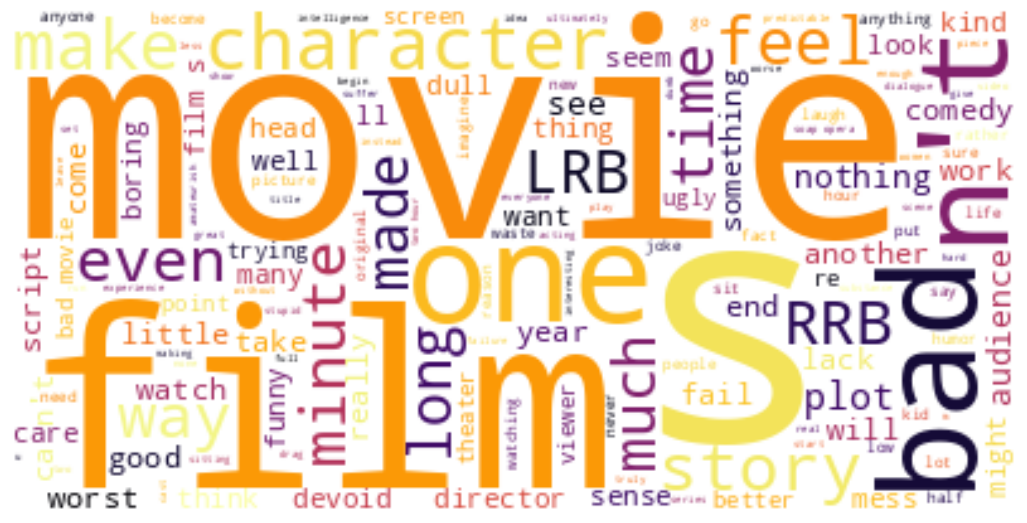

In [32]:
wordcloud_negative = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_negative.generate(negative_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_negative, interpolation = "bilinear")
plt.axis("off")
plt.show()

<a id="part_1_sentiment_class"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Sentiment Classification with Machine Learning, Deep Learning and BERT model ✨</p>

<a id="part_2"></a>
# <p style="background-color:#FF6961; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ PART - 2 Machine Learning ✨</p>



<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">
    Content
  </h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#part_2_train_test" role="tab" aria-controls="profile">
    Train - Test Split
    <span class="badge badge-primary badge-pill">1</span>
  </a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#part_2_count" role="tab" aria-controls="messages">
    Count Vectorization
    <span class="badge badge-primary badge-pill">2</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_tfidf" role="tab" aria-controls="settings">
    TF-IDF
    <span class="badge badge-primary badge-pill">3</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_eval" role="tab" aria-controls="settings">
    Eval Function
    <span class="badge badge-primary badge-pill">4</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_logistic" role="tab" aria-controls="settings">
    1. Logistic Regression
    <span class="badge badge-primary badge-pill">5</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_naive" role="tab" aria-controls="settings">
    2. Naive Bayes
    <span class="badge badge-primary badge-pill">6</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_svm" role="tab" aria-controls="settings">
    3. Support Vector Machine (SVM)
    <span class="badge badge-primary badge-pill">7</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_random" role="tab" aria-controls="settings">
    4. Random Forest
    <span class="badge badge-primary badge-pill">8</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_ada" role="tab" aria-controls="settings">
    5. Ada Boosting
    <span class="badge badge-primary badge-pill">9</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_cat" role="tab" aria-controls="settings">
    6. Catboost
    <span class="badge badge-primary badge-pill">11</span>
  </a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_2_xgb" role="tab" aria-controls="settings">
    7. XGBoost
    <span class="badge badge-primary badge-pill">12</span>
  </a>
</div>


<a href="#part_2" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 2</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

<a id="part_2_train_test"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Train - Test Split ✨</p>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = train["Phrase"].values
y = train["Sentiment"].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1 , stratify = y, random_state = 42)

<a id="part_2_count"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Count Vectorization ✨</p>

<a href="#part_2" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 2</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

![image.png](https://knowledge.dataiku.com/latest/_images/count-vec-concept.png)

[Credit](https://www.google.com/url?sa=i&url=https%3A%2F%2Fknowledge.dataiku.com%2Flatest%2Fml-analytics%2Fnlp%2Fconcept-text-features-for-ml.html&psig=AOvVaw07STxmOWAqQNr1wsA-04LS&ust=1702326704087000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCJiLk6zbhYMDFQAAAAAdAAAAABAD)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
%%time
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

CPU times: user 21.3 s, sys: 10.5 ms, total: 21.3 s
Wall time: 21.3 s


In [38]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,abderrahmane,abdul,abel,abhorrent,abhors,abiding,ability,abject,able,ably,abomination,aboriginal,aborted,abound,abrasive,...,zelda,zellweger,zemeckis,zen,zero,zest,zeus,zhang,zhao,zhuangzhuang,zing,zinger,zip,zipper,zippy,zishe,ziyi,zoe,zombie,zone,zoning,zoolander,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id="part_2_tfidf"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ TF-IDF ✨</p>

<a href="#part_2" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 2</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

![image.png](https://knowledge.dataiku.com/latest/_images/tf-idf-concept.png)
[Credit](https://www.google.com/url?sa=i&url=https%3A%2F%2Fknowledge.dataiku.com%2Flatest%2Fml-analytics%2Fnlp%2Fconcept-text-features-for-ml.html&psig=AOvVaw1-KYQYnYLidpiO18ih3Ip1&ust=1702326774194000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCPj0qc3bhYMDFQAAAAAdAAAAABAD)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
%%time
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

CPU times: user 20 s, sys: 2.72 ms, total: 20 s
Wall time: 20 s


In [42]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,abderrahmane,abdul,abel,abhorrent,abhors,abiding,ability,abject,able,ably,abomination,aboriginal,aborted,abound,abrasive,...,zelda,zellweger,zemeckis,zen,zero,zest,zeus,zhang,zhao,zhuangzhuang,zing,zinger,zip,zipper,zippy,zishe,ziyi,zoe,zombie,zone,zoning,zoolander,zucker,zwick,zzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# X_train_count_df = pd.DataFrame(X_train_count.toarray())
# X_test_count_df = pd.DataFrame(X_test_count.toarray())
# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split
# clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
# models, predictions = clf.fit(X_train_count_df, X_test_count_df, y_train, y_test)

# models

<a id="part_2_eval"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨ Eval Function ✨</p>

<a href="#part_2" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:white;">Part - 2</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [45]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train,y_pred_train))

<a id="part_2_logistic"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ✨1. Logistic Regression ✨</p>

In [46]:
# ✨ CountVectorizer ✨

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(class_weight = "balanced", max_iter=1000, random_state = 42) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [51]:
print("Countvectorizer LOG MODEL")
eval(log, X_train_count, X_test_count)

Countvectorizer LOG MODEL
[[ 181  337  176   12    1]
 [ 139 1087 1395  100    6]
 [  24  428 6962  528   16]
 [   5   72 1455 1597  164]
 [   1   15  117  479  309]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.26      0.34       707
           1       0.56      0.40      0.47      2727
           2       0.69      0.87      0.77      7958
           3       0.59      0.48      0.53      3293
           4       0.62      0.34      0.44       921

    accuracy                           0.65     15606
   macro avg       0.60      0.47      0.51     15606
weighted avg       0.63      0.65      0.63     15606

Train_Set
[[ 2568  2436  1254    95    12]
 [  744 11924 11071   763    44]
 [  202  3111 64501  3674   136]
 [   26   569 11759 16205  1075]
 [    1    65  1067  3614  3538]]
              precision    recall  f1-score   support

           0       0.73      0.40      0.52      6365
           1       0.66      0.49      0.56     24

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


model = LogisticRegression(C = 0.01, class_weight = "balanced", max_iter=1000)

scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores_log_c = pd.DataFrame(scores, index = range(1, 11))
df_scores_log_c.mean()[2:]

test_precision          NaN
train_precision         NaN
test_recall             NaN
train_recall            NaN
test_f1                 NaN
train_f1                NaN
test_accuracy      0.525674
train_accuracy     0.545603
dtype: float64